# Jay Bhanushali (60009200047)
---
## Making Data Stationary

In [1]:
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

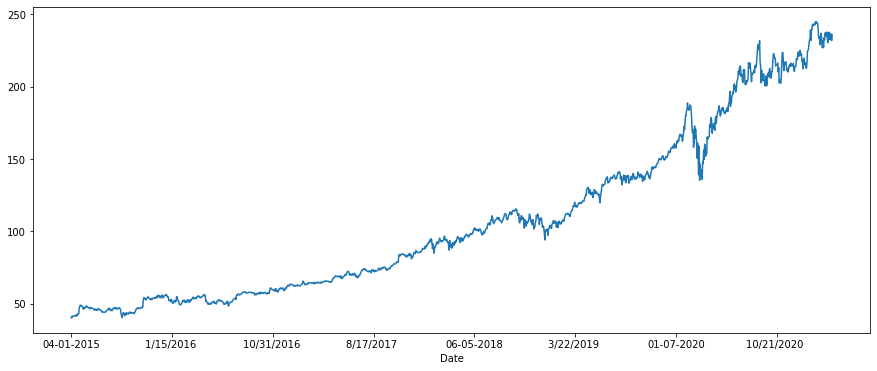

In [2]:
df = pd.read_csv(r'/content/Microsoft_Stock.csv', header=0, index_col=0)
df['Close'].plot(figsize=(15,6))
pyplot.show()

In [3]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data. 
    #T is simply the calculated difference represented in units of standard error. 
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.
    
    dfoutput = pd.Series(dftest[0:5], index=['Test Statistic',
                                             'p-value','No Lags Used',
                                             'Number of Observations Used',
                                             ' Critical values'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value 
       # Critical values for the ADF test for 1%, 5%, and 10% significance levels 
       #  with the constant model are −3.43, −2.87, and −2.57, respectively.
    print(dfoutput)

    p_value = dftest[1]
    if p_value <= 0.05 :
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [4]:
Augmented_Dickey_Fuller_Test_func(df['Close'] , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                          1.737136
p-value                                                                 0.998216
No Lags Used                                                                  24
Number of Observations Used                                                 1486
 Critical values               {'1%': -3.4347582315402434, '5%': -2.863486949...
Critical Value (1%)                                                    -3.434758
Critical Value (5%)                                                    -2.863487
Critical Value (10%)                                                   -2.567807
dtype: object
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


### 1st Differencing

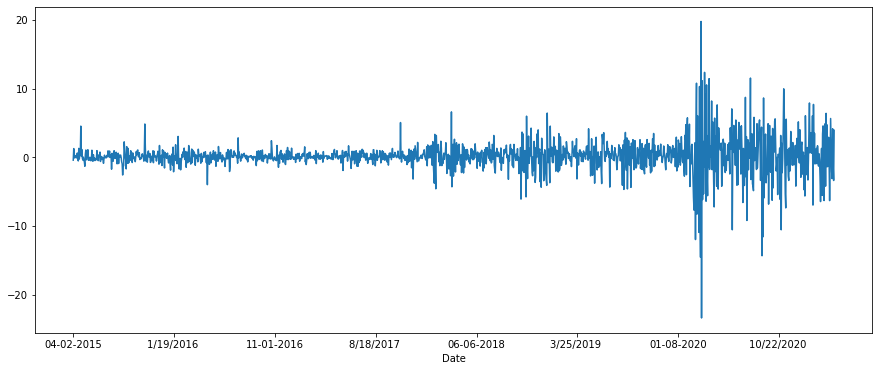

In [7]:
close = df['Close'].diff().dropna()
close.plot(figsize=(15,6))

In [8]:
Augmented_Dickey_Fuller_Test_func(close , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                        -10.038331
p-value                                                                      0.0
No Lags Used                                                                  24
Number of Observations Used                                                 1485
 Critical values               {'1%': -3.43476120520139, '5%': -2.86348826217...
Critical Value (1%)                                                    -3.434761
Critical Value (5%)                                                    -2.863488
Critical Value (10%)                                                   -2.567807
dtype: object
Conclusion:====>
Reject the null hypothesis
Data is stationary
